In [211]:
import os, sys

sys.path.append(os.path.abspath(os.path.join("../..")))
from utils import *

In [212]:
from sklearn.datasets import load_iris

In [213]:
iris = load_iris()

In [214]:
X = iris.data
y = iris.target

In [215]:
df = pd.DataFrame(X, columns=iris.feature_names)
df["label"] = iris.target_names[y]

In [216]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [217]:
COLOR_MAP = {"setosa": "#e67e22", "versicolor": "#27ae60", "virginica": "#9b59b6"}

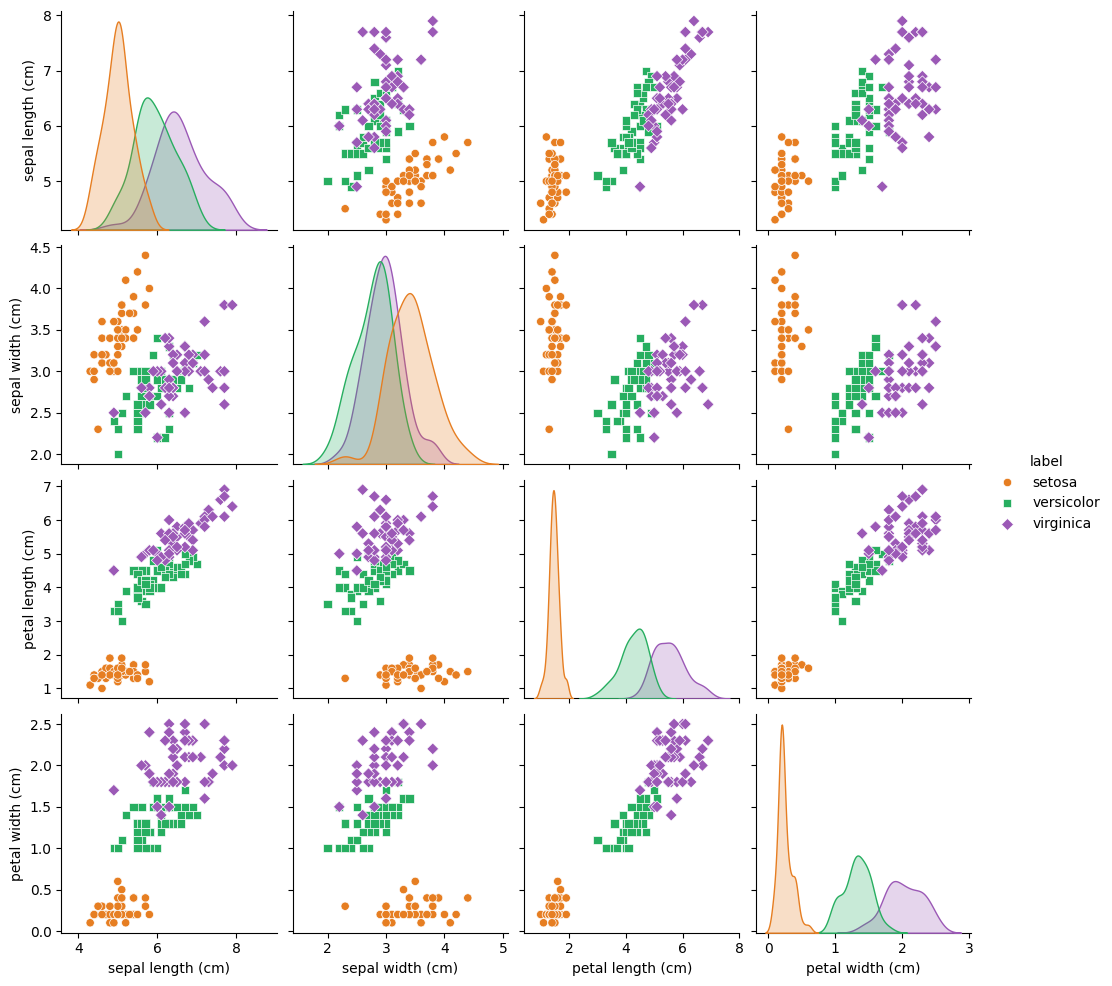

In [218]:
graph = sns.pairplot(df, hue="label", palette=COLOR_MAP, markers=["o", "s", "D"])

In [219]:
features = [2, 3]
X = iris.data[:, features]
y = iris.target

x_names = [iris.feature_names[i] for i in features]
y_names = iris.target_names

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [220]:
from sklearn.tree import DecisionTreeClassifier

In [221]:
def plot_surface(clf, X, y, xnames, ynames):
    n_classes = 3
    plot_step = 0.02
    markers = ["o", "s", "^"]

    plt.figure(figsize=(10, 10))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.xlabel(xnames[0])
    plt.ylabel(xnames[1])

    from matplotlib.colors import ListedColormap

    # we pick a color map to match that used by decision tree graphviz
    cmap = ListedColormap(["orange", "green", "purple"])
    plot_colors = [cmap(i) for i in range(4)]

    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
    # Plot the training points
    for i, color, marker in zip(range(n_classes), plot_colors, markers):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            label=ynames[i],
            edgecolor="black",
            color=color,
            s=50,
            cmap=cmap,
            marker=marker,
        )

In [222]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)
tree_clf.score(X_test, y_test)

0.9736842105263158

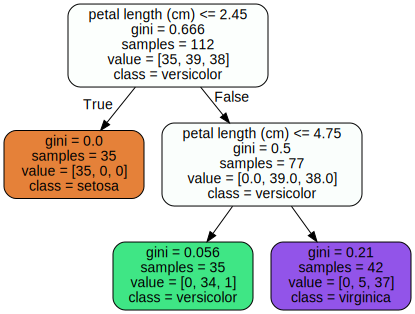

In [223]:
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=x_names,
    class_names=y_names,
    rounded=True,
    filled=True,
)

Source.from_file("iris_tree.dot")

/tmp/ipykernel_38329/1900975519.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


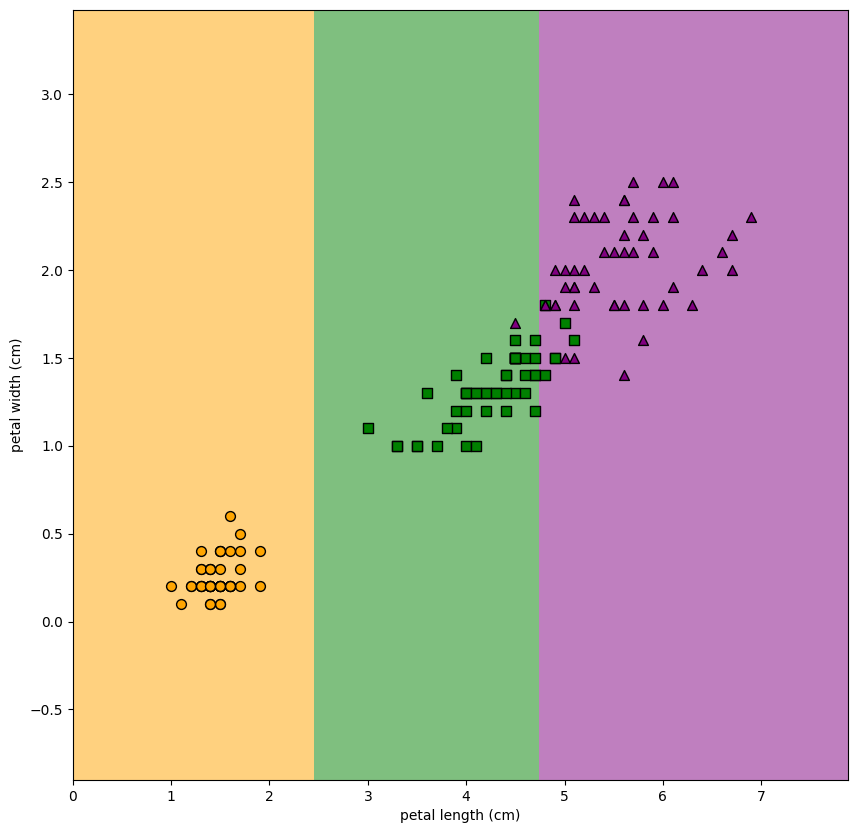

In [224]:
plot_surface(tree_clf, X, y, x_names, y_names)

In [225]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)
tree_clf.score(X_test, y_test)

1.0

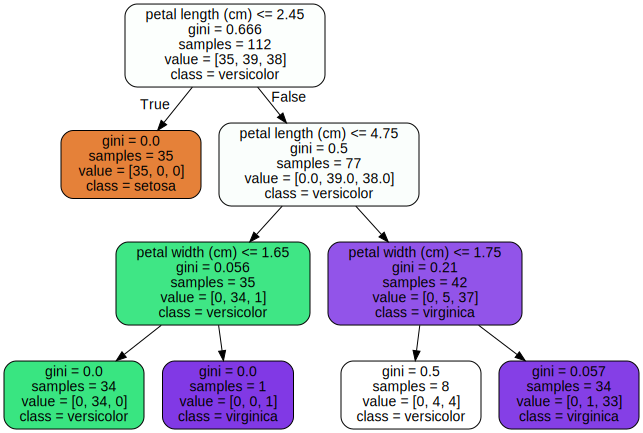

In [226]:
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=x_names,
    class_names=y_names,
    rounded=True,
    filled=True,
)

Source.from_file("iris_tree.dot")

/tmp/ipykernel_38329/1900975519.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


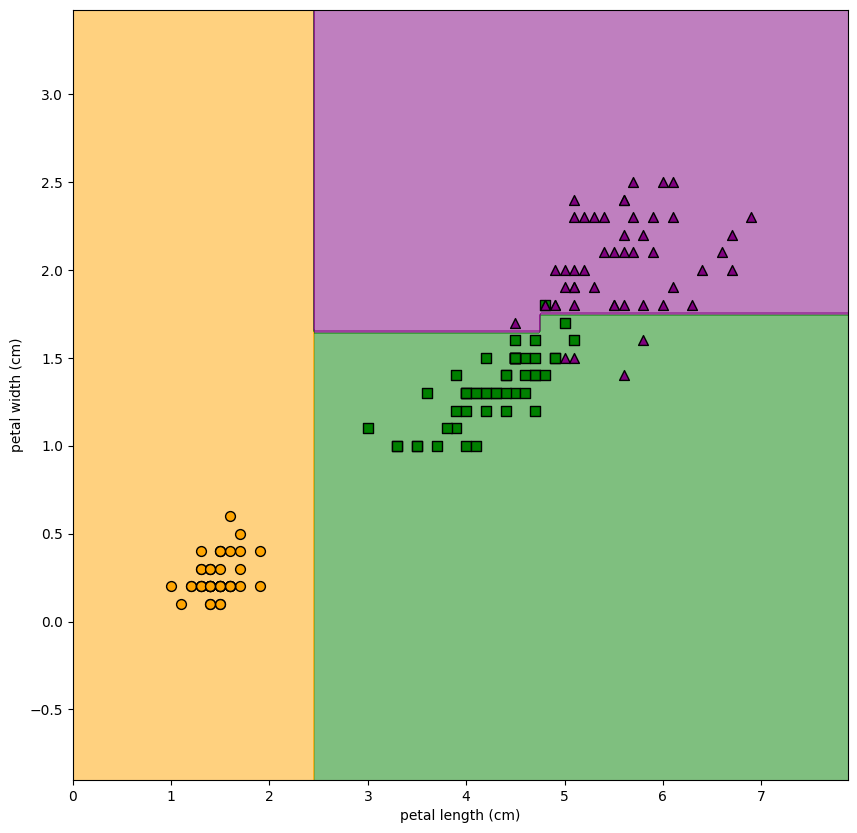

In [227]:
plot_surface(tree_clf, X, y, x_names, y_names)